# Prevendo "Customer Churn" em Operadoras de Telecom

<p>Customer Churn (ou Rotatividade de Clientes, em uma tradução livre)
refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento
comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a
rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de
fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a
regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da
receita. Portanto, é muito importante prever os usuários que provavelmente
abandonarão o relacionamento comercial e os fatores que afetam as decisões do
cliente.<p>
    
### Definindo o problema de Negócio
<p> você deve prever o Customer Churn em uma Operadora de
Telecom.<p>
Seu trabalho é criar um modelo de aprendizagem de máquina que
possa prever se um cliente pode ou não cancelar seu plano e qual a probabilidade
de isso ocorrer. O cabeçalho do dataset é uma descrição do tipo de informação
em cada coluna.
Usando linguagem Python, recomendamos você criar um modelo de
Regressão Logística, para extrair a informação se um cliente vai cancelar seu
plano (Sim ou Não) e a probabilidade de uma opção ou outra.

# Importando as bibliotecas

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

# Conhecendo o Dataset

In [2]:
# colunas selecionadas
cols = ['state', 'account_length', 'area_code',
        'international_plan', 'voice_mail_plan', 'number_vmail_messages',
        'total_day_minutes', 'total_day_calls', 'total_day_charge',
        'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
        'total_night_minutes', 'total_night_calls', 'total_night_charge',
        'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn']

# importando o dataset
df = pd.read_csv('telecom_treino.csv', names=cols, header=0)

df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [3]:
# analisando o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

# Análise Exploratória

no     0.855086
yes    0.144914
Name: churn, dtype: float64


C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


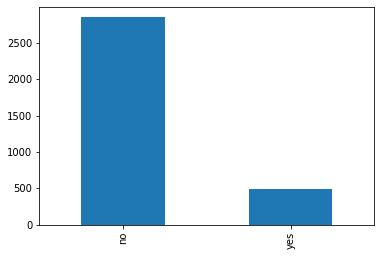

In [4]:
# verificando as distribuições das labels
print(df.churn.value_counts(normalize=True))
df.churn.value_counts().plot("bar")

Podemos ver claramente, o quanto as classes são desbalanceadas, optei em não mexer no dataset para ver como o modelo irá se comportar.

In [5]:
# convertendo as variáveis categóricas em categóricas numéricas
# Isso é importante porque o modelo que vou usar não suporta string

def convert_features(data):
    data['churn'] = data.churn.map({'yes':1, 'no':0})
    data['international_plan'] = data.international_plan.map({'yes':1,'no':0})
    data['voice_mail_plan'] = data.voice_mail_plan.map({'yes':1, 'no':0})
    data['area_code'] = data.area_code.map({'area_code_408':0, 'area_code_415':1, 'area_code_510':2})
    return data

convert_features(df)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,NJ,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,OK,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3330,WV,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3331,RI,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3332,CT,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


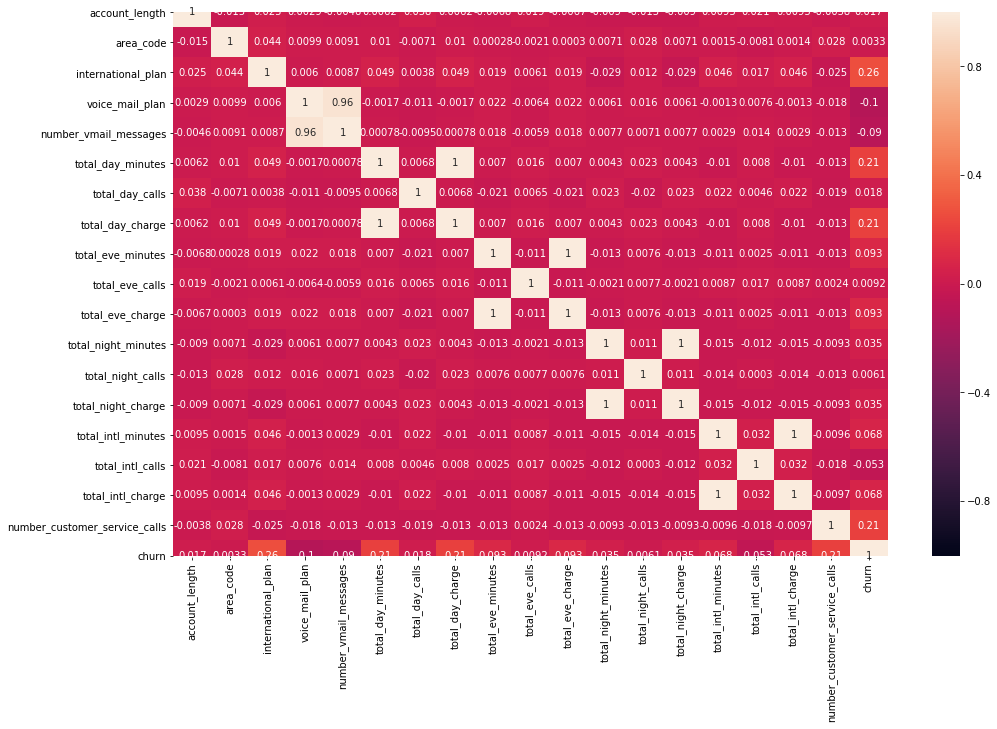

In [6]:
# Analisando visualmente as correlações entre as variáveis
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

O ideal é termos variáveis com a correlação alta com nosso target, variável "churn".  Podemos observar que há variáveis que se relacionam entre si, e isso não é bom para o modelo, as duas variáveis que correlacionam pode dar um peso maior pois são dependentes entre si, com isso tiraremos uma variável de cada um desses pares.

In [7]:
# removendo as features com correlações elevadas
correl_features = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 
                   'total_night_charge', 'total_intl_charge']

df = df.drop(correl_features, axis=1)

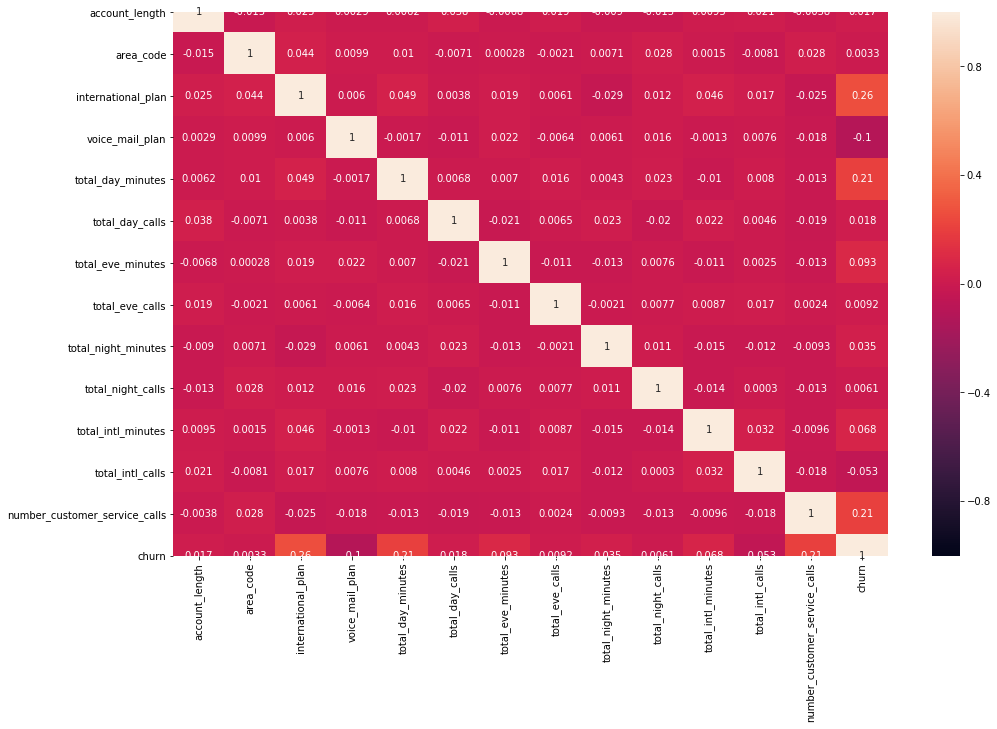

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Podemos notar que não correlações altas, que se distanciam do zero, com o nosso target, "churn". Vou rodar o modelo mesmo assim.

# Modelagem Preditiva

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from lightgbm import LGBMClassifier
from skopt import forest_minimize

from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from time import time

In [10]:
# dividindo as labels em X e y
X = df.drop('churn', axis=1)
y = df.churn

# removendo duas variaveis categóricas a princípio
X = X.drop(['state'], axis=1)

In [11]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.33, random_state=42)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((2233, 13), (1100, 13), (2233,), (1100,))

### Random Forest Classifier

In [12]:
rfc = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, class_weight='balanced', n_jobs=6, random_state=42)
rfc.fit(Xtrain, ytrain)
pred_rfc = rfc.predict(Xval)
pr_rfc = rfc.predict_proba(Xval)[:,1]

In [13]:
print(accuracy_score(yval, pred_rfc))

0.9372727272727273


In [14]:
print(average_precision_score(yval, pred_rfc), roc_auc_score(yval, pr_rfc))

0.6299222488038279 0.9396376329787234


### Decision Tree Classifier

In [15]:
dtc = DecisionTreeClassifier(min_samples_leaf=2, class_weight='balanced')
dtc.fit(Xtrain, ytrain)
pred_dtc = dtc.predict(Xval)
pr_dtc = dtc.predict_proba(Xval)[:,1]

In [16]:
print(accuracy_score(yval, pred_dtc))

0.9009090909090909


In [17]:
print(average_precision_score(yval, pred_dtc), roc_auc_score(yval, pr_dtc))

0.5085872235872236 0.8483643617021277


### LightGBM

In [18]:
lr = 0.07722311631557899
max_depth = 9
min_child_samples = 19
subsamples = 0.8545752910656856
colsample_bytree = 0.7141753925564633
n_estimators = 373


lgbm = LGBMClassifier(learning_rate=lr, num_leaves=2 ** max_depth, max_depth=max_depth,
                      min_child_samples=min_child_samples, subsample=subsamples,
                      colsample_bytree=colsample_bytree, bagging_freq=1, n_estimators=373, random_state=0,
                      class_weight="balanced", n_jobs=6)
lgbm.fit(Xtrain, ytrain)

pred_lgbm = dtc.predict(Xval)
p_lgbm = lgbm.predict_proba(Xval)[:, 1]

In [19]:
print(accuracy_score(yval, pred_lgbm))

0.9009090909090909


In [20]:
print(average_precision_score(yval, p_lgbm), roc_auc_score(yval, p_lgbm))

0.885439695530038 0.9283178191489362


Utilizei somente esses três modelos e com base nisso, vou escolher como **baseline** o resultado da Random Forest, com **62% de "average precision"**, assim como o **modelo selecionado**, porque acredito que o do LGBM, mesmo com um average precision maior, esteja com mais overfitting.

O **overfitting** sempre tem um mínimo que seja, pois quando colocamos o modelo em produção, a acurácia tende cair, porém essa queda não pode ser muita e o modelo deve ser generalizado, tanto quanto possível.

Por que "average precision"?
- Porque a precisão é o quanto da classe de interesse o modelo acerta, no nosso caso, é mais interessante que o **modelo acerte mais a previsão de quando o cliente vai romper o contrato**, com isso precisamos focar mais nisso.

# Selecionando os melhores parametros e treinando o modelo

### Random Forest Classifier

In [21]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


param_dist = {'n_estimators': [100, 500, 1000, 10000],
              'min_samples_leaf': [0,1,2,3,4,5,6,8,10],
              'max_depth': [None, 1, 2],
              'criterion': ['gini', 'entropy'],
              'class_weight': ['balanced'],
              'n_jobs': [1,2,3,4,5,6,7,8]}


seed = 6
rfc = RandomForestClassifier()

n_iter_search = 5
start = time()
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, random_state=seed)

random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 39.68 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.950 (std: 0.006)
Parameters: {'n_jobs': 3, 'n_estimators': 500, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.930 (std: 0.010)
Parameters: {'n_jobs': 4, 'n_estimators': 100, 'min_samples_leaf': 8, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.842 (std: 0.020)
Parameters: {'n_jobs': 3, 'n_estimators': 500, 'min_samples_leaf': 1, 'max_depth': 2, 'criterion': 'gini', 'class_weight': 'balanced'}



### Usando Cross Validation com os parâmetros encontrados

Após "rankear" os melhores parâmetros com a Random Forest através do **RandomizedSearchCV** e selecionar os parâmetros da 1ª posição, utilizarei o **Cross Validation** e verificarei a novamente a **acurácia** (não muito relevante) e a **average precision**.

In [22]:
seed = 6
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

mdl = RandomForestClassifier(n_jobs=3, n_estimators=500, min_samples_leaf=3, max_depth=None, 
                             criterion='gini', class_weight='balanced', random_state=seed)

scoring = ['accuracy', 'average_precision']

for i in scoring:
    results = cross_val_score(mdl, X, y, cv=kfold, scoring=i)
    print(i,": %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

accuracy : 95.259% (1.057%)
average_precision : 86.016% (3.240%)


Após algumas pesquisas, vou testar o **StratifiedKFold** que é melhor para classes desbalanceadas, que é feito a divisão aleatória para treino e teste, ele mantém a mesma proporção das classes entre as divisões. Vamos verificar se o resultado é melhor que **KFold**.

In [23]:
seed = 6
Strat_kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

mdl = RandomForestClassifier(n_jobs=3, n_estimators=500, min_samples_leaf=2, max_depth=None, 
                             criterion='gini', class_weight='balanced', random_state=seed)

scoring = ['accuracy', 'average_precision']

for i in scoring:
    resultsRF = cross_val_score(mdl, X, y, cv=Strat_kfold, scoring=i)
    print(i,": %.3f%% (%.3f%%)" % (resultsRF.mean()*100.0, resultsRF.std()*100.0))

accuracy : 95.290% (0.939%)
average_precision : 86.124% (3.360%)


Embora estatisticamente a diferença não seja significativa entre o KFold e o StratifiedKFold, para um modelo que tenha muitos dados (big data), essa diferença é significativa, embora esteja sendo usado somente para variar as amostras de treino e teste, para sermos mais justo na escolha dos parâmetros adequados para o modelo.

#### Random Forest
For StratifiedKFold:
- n_jobs=3, n_estimators=500, min_samples_leaf=3, max_depth=None, criterion='gini', class_weight='balanced', random_state=seed
 - accuracy : 95.350% (0.829%)
 - average_precision : 85.592% (3.177%)
 
- n_jobs=3, n_estimators=1000, min_samples_leaf=3, max_depth=None, criterion='gini', class_weight='balanced', random_state=seed
 - accuracy : 95.290% (0.891%)
 - average_precision : 85.634% (3.354%)
 
- **n_jobs=3, n_estimators=500, min_samples_leaf=2, max_depth=None, criterion='gini', class_weight='balanced', random_state=seed**
 - accuracy : 95.290% (0.939%)
 - average_precision : 86.124% (3.360%)

Mesmo o modelo encontrando os melhores parâmetros, fiz algumas variações para ver se não melhorava mais, porque os melhores parâmetros foram encontrados aleatórios e algum valor poderia ser ainda melhor. Realmente conseguimos melhorar dos parâmetros iniciais.

### Treinamento com todos os dados de treino

Finalmente após vários testes, encontramos os melhores parâmetros para a Random Forest.

In [24]:
rfc = RandomForestClassifier(n_jobs=4, n_estimators=500, min_samples_leaf=2, max_depth=None, 
                             criterion='gini', class_weight='balanced', random_state=seed)

rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
                       oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

# Prevendo nos dados de teste

Necessário realizar todos os passos que fizemos nos dados de treino, neste caso foi simples porque somente retiramos as variáveis que se correlacionavam entre si e as que não faziam sentido para o modelo. Para as categóricas convertemos em variáveis numéricas.

Caso tivessemos dados faltando em uma feature importante, ou se precisassemos fazer alguma normalização ou padronização, utilizariamos o "fit_transform" com os dados de treino e para os dados de teste somente o "transform".

In [25]:
# importando o dataset de teste
df_test = pd.read_csv('telecom_teste.csv', names=cols, header=0)

# convertendo as variáveis categóricas em categóricas numéricas
convert_features(df_test)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,HI,101,2,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
2,MT,137,2,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
3,OH,103,0,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
4,NM,99,1,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
5,SC,108,1,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,HI,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
1664,WV,152,1,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
1665,DC,61,1,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
1666,DC,109,2,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


### Realizando a previsão

In [26]:
# tirando as variáveis correlacionadas entre si
df_test = df_test.drop(correl_features, axis=1)

# dividindo as labels em X e y
ytest = df_test.churn
df_test = df_test.drop('churn', axis=1)

# tirando a variável categórica sem relevancia para o modelo
df_test = df_test.drop(['state'], axis=1)

In [27]:
pred_rfc_test = rfc.predict(df_test)
p_rfc = rfc.predict_proba(df_test)[:,1]

print(accuracy_score(ytest, pred_rfc_test))

print(average_precision_score(ytest, pred_rfc_test), roc_auc_score(ytest, p_rfc))

0.9574085182963408
0.7225187728726444 0.921987921987922


# Conclusão

Nosso modelo conseguiu bater a **baseline de  62% de "average precision"** nos dados de treino e validação, para um **resultado de 72% de "average precision"**, melhorando aproximadamente **14%**.

Com o modelo prevendo melhor, a empresa pode tentar impedir que 14% a mais de clientes deixam de cancelar seus contratos. **Algumas sugestões de como a empresa poderia se antecipar e evitar uma eventual quebra de contrado:**
- Descontos de produtos;
- pesquisa de satisfação para identificar qual o ponto de insatisfação do cliente;
- Campanha de marketing, entre outros.

**Como poderíamos melhoras ainda mais nosso modelo?**
<p>Uma opção seria identificar os clientes com as menores probabilidades de cancelar o contrato e retirar do dataset para equilibrar um pouco mais as labels.